 # <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Project in Computer Vision

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;"> Important Note: 
    
### <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;"> Following project was done running in localhost and colab. Both project together is not running anywhere, it crashes out in colab due to memory usage (Even after resizing it to 32 * 32). I got it working one project after in different system and finally tested in GPU to get the result faster. It was almost need 50 processing unit to run both Part-A and Part-B.
    
    
## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;"> CAUTION !!! THIS NOTEBOOK MAY NOT RUN IN PC ALSO I BELIEVE PYTHON 3.9 MAY ALSO HAVE PROBLEM DUE TO https://github.com/tflearn/tflearn/issues/1170 (me). THIS ISSUE WAS CAUSING ME EXCEPTION DISCUSSED AT https://glcommunity.mygreatlearning.com/question/notimplementederror-numpy-is-only-available-when-eager-execution-is-enabled--63a46e0071a897fff3df91f4

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Import all required modules

In [1]:
!pip install tflearn
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 107 kB 5.2 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=450b163b37113664267a690d69a47f0791a08e781c66712f51d0673ec466f2bc
  Stored in directory: /root/.cache/pip/wheels/65/9b/15/cb1e6b279c14ed897530d15cfd7da8e3df8a947e593f5cfe59
Successfully built tflearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
%matplotlib inline

import math as math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Functions 

In [3]:
from platform import python_version 
python_version()

'3.8.16'

In [4]:
#tfl.tf.enable_eager_execution()
print(tf.__version__ )
tf.executing_eagerly()

2.9.2


True

# <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> PART - A

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q1 A - Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python.


In [5]:
from zipfile import ZipFile

In [6]:
zip_directory='/tmp'

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  To work in colab enable next cell but disable cell next. How can we eneralize it

In [7]:
from google.colab import drive
drive.mount('/content/drive/')
file = ZipFile("drive/My Drive/Colab Notebooks/plant-seedlings-classification.zip", 'r')
file.extractall("/tmp")
file.close()

Mounted at /content/drive/


In [8]:
#file = ZipFile('plant-seedlings-classification.zip')
#file.extractall(zip_directory)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q1 B - Map the images from train folder with train labels to form a DataFrame.


In [9]:
# Read directory name and convert it as Series
import os

image_location = zip_directory + '/' + 'plant-seedlings-classification/train'
dir_name = os.listdir(path=image_location)
labels = []
for dir in dir_name:
    if os.path.isdir(image_location + '/' + dir):
        labels.append(dir)

In [10]:
print(labels)
label_series = pd.Series(labels)

['Sugar beet', 'Black-grass', 'Charlock', 'Maize', 'Fat Hen', 'Small-flowered Cranesbill', 'Common wheat', 'Cleavers', 'Shepherds Purse', 'Loose Silky-bent', 'Scentless Mayweed', 'Common Chickweed']


In [11]:
from PIL import ImageTk, Image

# Create filename and read file along with Label
df = pd.DataFrame(columns=['image_file_name','image','class'])
i = 0
src_image_size=[]
for label in labels:
    count = 0
    for file in os.scandir(image_location + '/' + label):
        # Few images given in the zip file are having 4 channels
        # Hence convert to 3 channel(RGB) image while loading
        image = Image.open(image_location + '/' + label + '/' + file.name).convert('RGB')
        width, height = image.size
        src_image_size.append({width,height})
        df.loc[i,'image_file_name'] = file.name
        img = np.array(image)
        #print(img.shape[2])
        if (img.shape[2] == 4):
            print(file.name)
        df.loc[i,'image'] = img
        df.loc[i,'class'] = label
        i = i + 1
        if count == -1:
            break
        count = count + 1

In [12]:
#src_image_size

In [13]:
df.sample(2)

,image_file_name,image,class
2118,33c5d5c61.png,"[[[90, 72, 56], [85, 67, 52], [71, 51, 38], [5...",Small-flowered Cranesbill
4682,6cc932059.png,"[[[96, 82, 71], [96, 83, 72], [95, 84, 73], [9...",Common Chickweed


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q1 C - Write a function that will select n random images and display images along with its species.


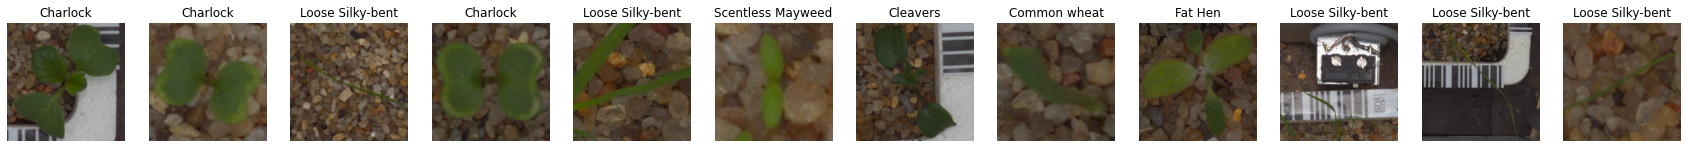

In [14]:
import random

# visualizing random 12 imagesfrom dataframe
# and display 1 random image per category
N=12
Max = len(df)
plt.figure(figsize=(30, 10))
for i in range(N):
    plt.subplot(1, N, i+1)
    loc = random.randint(1, Max) 
    #print(loc)
    #print(df.loc[loc, 'image'][0].size())
    plt.imshow(df.loc[loc, 'image']); #, cmap="gray")
    plt.title("{}".format(df.loc[loc, 'class']))
    plt.axis('off')
plt.show()

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q2 A - Create X & Y from the DataFrame.


In [15]:
X = df.drop('class', axis=1)
Y = df['class']

In [16]:
X.sample(2)

,image_file_name,image
4442,8575a6820.png,"[[[77, 93, 4], [83, 98, 16], [82, 97, 13], [82..."
4303,d920f1441.png,"[[[88, 71, 54], [91, 74, 57], [88, 70, 53], [8..."


In [17]:
Y

0             Sugar beet
1             Sugar beet
2             Sugar beet
3             Sugar beet
4             Sugar beet
              ...       
4745    Common Chickweed
4746    Common Chickweed
4747    Common Chickweed
4748    Common Chickweed
4749    Common Chickweed
Name: class, Length: 4750, dtype: object

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q2 B - Encode labels of the images.


In [18]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'class'.
Y= label_encoder.fit_transform(df['class'])
  
set(Y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q2 C - Unify shape of all the images.


In [19]:
import skimage.transform as st
from PIL import ImageTk, Image

length = len(X)
for i in range(len(X)):
    X.loc[i, 'image'] = st.resize(X.loc[i, 'image'], (256, 256))
    if i == length + 10: # It never breaks
        print("do not expect this line")
        break


In [20]:
# Observe the chang in image
X.sample(2)

,image_file_name,image
4545,0704bc02b.png,"[[[0.3536262661803, 0.2941544626273357, 0.2202..."
2942,fe3bcb925.png,"[[[0.32196157118853386, 0.23682829912971032, 0..."


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q2 D - Normalise all the images.


In [21]:
X['image'] = X['image'] / 255
X['image']

0       [[[0.0016588571703191073, 0.001397419261822377...
1       [[[0.0009218810073048816, 0.000680657679738559...
2       [[[0.0015074709753310042, 0.001245674740484434...
3       [[[0.0010330959321534971, 0.000857562483479910...
4       [[[0.001410034602076117, 0.001290954801038056,...
                              ...                        
4745    [[[0.0014254733756247603, 0.001252838451557093...
4746    [[[0.000846149542844097, 0.0005882625147178956...
4747    [[[0.0016418004136780316, 0.001315127163380669...
4748    [[[0.0017455202870440309, 0.001713871235390969...
4749    [[[0.0017785189290176844, 0.001495338331410995...
Name: image, Length: 4750, dtype: object

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q3 A - Split the data into train and test data.


In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=104, test_size=0.20)
  

In [23]:
print(f"X train shape is {x_train.shape} and Y train shape is {y_train.shape}")
print(f"X test shape is {x_test.shape} and Y train shape is {y_test.shape}")

X train shape is (3800, 2) and Y train shape is (3800,)
X test shape is (950, 2) and Y train shape is (950,)


In [24]:
x_nn_train = x_train['image']
x_nn_test  = x_test['image']

In [25]:
len(x_nn_train)

3800

In [26]:
len(x_nn_test)

950

In [27]:
x_cnn_train = np.empty((len(x_nn_train), 256, 256, 3))
x_cnn_test = np.empty((len(x_nn_test), 256, 256, 3))

In [28]:
sr = x_train['image']
count = 0
for items in sr.iteritems():
    #print(items[1].shape)
    #print(count)
    #print(items[1])
    x_cnn_train[count] = items[1]
    count = count + 1
    
print(count)

3800


In [29]:
sr = x_test['image']
count = 0
for items in sr.iteritems():
    x_cnn_test[count] = items[1]
    count = count + 1
    
print(count)

950


In [30]:
print(f"Train = {x_cnn_train.shape} {y_train.shape} and Test = {x_cnn_test.shape} {y_test.shape}")

Train = (3800, 256, 256, 3) (3800,) and Test = (950, 256, 256, 3) (950,)


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Part A = Q3 B Create new CNN architecture to train the model.


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer,Activation, Conv2D, Dropout, Dense, Flatten, BatchNormalization, MaxPool2D, GlobalMaxPool2D
from tensorflow.keras import optimizers

In [32]:
def get_model():
    model = Sequential()
    
    model.add(InputLayer(input_shape = (256,256,3,)))
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))

    # Max Pool layer 
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))
    
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(GlobalMaxPool2D())

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Dense(12, activation='softmax'))
    return model

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q3 C - Train the model on train data and validate on test data.


In [44]:
#optimizer = Adam(learning_rate=0.001)
model = get_model()
model.compile(optimizer='SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#model.summary()

In [45]:
model.fit(x_cnn_train, y_train, epochs = 25, validation_data=(x_cnn_test, y_test))

Epoch 1/25
119/119 [==============================] - 5s 38ms/step - loss: 2.4517 - accuracy: 0.2068 - val_loss: 2.6049 - val_accuracy: 0.1421
Epoch 2/25
119/119 [==============================] - 4s 30ms/step - loss: 1.7360 - accuracy: 0.4292 - val_loss: 2.7954 - val_accuracy: 0.1421
Epoch 3/25
119/119 [==============================] - 4s 30ms/step - loss: 1.3539 - accuracy: 0.5653 - val_loss: 2.8078 - val_accuracy: 0.1421
Epoch 4/25
119/119 [==============================] - 4s 30ms/step - loss: 1.0810 - accuracy: 0.6511 - val_loss: 3.3073 - val_accuracy: 0.0853
Epoch 5/25
119/119 [==============================] - 4s 30ms/step - loss: 0.9016 - accuracy: 0.7100 - val_loss: 3.9936 - val_accuracy: 0.0684
Epoch 6/25
119/119 [==============================] - 4s 30ms/step - loss: 0.7684 - accuracy: 0.7437 - val_loss: 4.4042 - val_accuracy: 0.0768
Epoch 7/25
119/119 [==============================] - 4s 29ms/step - loss: 0.6791 - accuracy: 0.7789 - val_loss: 4.0254 - val_accuracy: 0.1084

In [46]:
from sklearn.metrics import classification_report

In [47]:
y_pred_1=model.predict(x_cnn_test)
y_pred_final_1=[]
for i in y_pred_1:
  y_pred_final_1.append(np.argmax(i))

print(classification_report(y_test,y_pred_final_1))

30/30 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

           0       0.79      0.52      0.63        65
           1       0.99      0.89      0.93        80
           2       0.84      0.88      0.86        52
           3       0.72      0.98      0.83       105
           4       0.97      0.78      0.86        40
           5       0.99      0.79      0.88        91
           6       0.77      0.94      0.84       135
           7       0.92      0.96      0.94        47
           8       0.84      0.96      0.90       107
           9       0.87      0.28      0.42        47
          10       0.93      0.94      0.94       100
          11       0.97      0.95      0.96        81

    accuracy                           0.86       950
   macro avg       0.88      0.82      0.83       950
weighted avg       0.87      0.86      0.85       950



## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q3 D - Select a random image and print actual label and predicted label for the same.


In [48]:
y_test_predict = model.predict(x_cnn_test)

30/30 [==============================] - 0s 10ms/step


In [49]:
random_int = random.randint(1, len(x_cnn_test))
print(random_int)
np.set_printoptions(suppress=True)
print(y_test_predict[random_int])
print(y_test[random_int])

435
[0.00098219 0.9713463  0.00089524 0.00337809 0.00332084 0.00002672
 0.00000928 0.00643025 0.00007854 0.00129506 0.0030801  0.00915738]
1


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:green;">  The model predicted correct class for a randomly selected image as 1 because the in the above predict values we have got high accuracy for 1.

# <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> PART - B

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part B - Q1 A - Import and read oxflower17 dataset from tflearn and split into X and Y while loading.


In [50]:
from tflearn.datasets import oxflower17

#X,Y = oxflower17.load_data()
X,Y = oxflower17.load_data(resize_pics=(32,32))

Instructions for updating:
non-resource variables are not supported in the long term


100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [51]:
X.shape

(1360, 32, 32, 3)

In [52]:
import cv2


In [53]:
import cv2
from PIL import Image

length = len(X)
print(length)
for i in range(len(X)):
  #X[i] = st.resize(X[i], (32, 32, 3))
  #print(X[i].shape)
  X[i] = cv2.resize(X[i], dsize=(32, 32))
  if i == length + 10:
    print("do not expect this line")
    break

1360


In [54]:
tf.image.resize(X, [32,32])

<tf.Tensor 'resize/ResizeBilinear:0' shape=(1360, 32, 32, 3) dtype=float32>

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part B - Q1 B - Print Number of images and shape of the images.


In [55]:
X.shape[0]

1360

In [56]:
X.shape

(1360, 32, 32, 3)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part B - Q1 C - Print count of each class from y.


In [57]:
Y.shape

(1360,)

In [58]:
Y

array([14, 10,  3, ...,  8,  3,  3])

In [59]:
for label in set(Y):
    print(f"Class {label} count is {Y.tolist().count(label)}")

Class 0 count is 80
Class 1 count is 80
Class 2 count is 80
Class 3 count is 80
Class 4 count is 80
Class 5 count is 80
Class 6 count is 80
Class 7 count is 80
Class 8 count is 80
Class 9 count is 80
Class 10 count is 80
Class 11 count is 80
Class 12 count is 80
Class 13 count is 80
Class 14 count is 80
Class 15 count is 80
Class 16 count is 80


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part B - Q2 A - Display 5 random images.


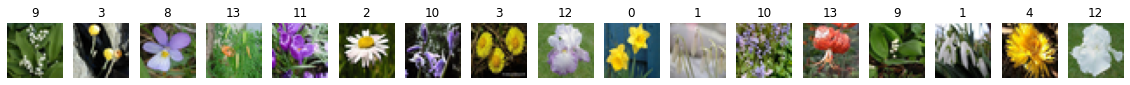

In [60]:
import random

# visualizing random 5 images 

N=17  # NUMBER OF IMAGE CATEGORIES
Max = len(X)
plt.figure(figsize=(20, 10))
for i in range(N):
    plt.subplot(1, N, i+1)
    loc = random.randint(1, Max) 
    plt.imshow(X[loc]); #, cmap="gray")
    plt.title("{}".format(Y[loc]))
    plt.axis('off')
plt.show()

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part B - Q2 B - Select any image from the dataset and assign it to a variable.


In [61]:
image = X[100]

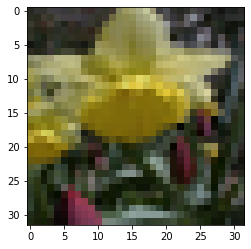

In [62]:
plt.imshow(image)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part B - Q2 C - Transform the image into grayscale format and display the same.


In [63]:
import skimage.color

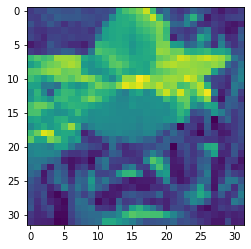

In [64]:
plt.imshow(skimage.color.rgb2gray(image))

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part B - Q2 D - Apply a filter to sharpen the image and display the image before and after sharpening.


In [65]:
#Import required image modules
from PIL import Image, ImageFilter

# Filter import
from PIL.ImageFilter import BLUR, SHARPEN

In [66]:
image.shape

(32, 32, 3)

In [67]:
np.uint8(image * 256)

array([[[42, 40, 34],
        [50, 50, 49],
        [51, 49, 43],
        ...,
        [31, 34, 34],
        [28, 32, 28],
        [41, 42, 40]],

       [[42, 45, 33],
        [40, 42, 32],
        [63, 59, 49],
        ...,
        [41, 44, 43],
        [42, 47, 46],
        [46, 48, 47]],

       [[56, 60, 47],
        [47, 42, 33],
        [59, 45, 37],
        ...,
        [22, 23, 18],
        [16, 19, 11],
        [21, 27, 19]],

       ...,

       [[50, 66, 48],
        [22, 34, 13],
        [39, 50, 16],
        ...,
        [31, 40, 12],
        [39, 45, 31],
        [30, 38, 24]],

       [[32, 43, 25],
        [23, 33, 12],
        [25, 36,  5],
        ...,
        [24, 33, 20],
        [20, 27, 16],
        [25, 31, 21]],

       [[28, 38, 17],
        [22, 30,  9],
        [19, 30,  7],
        ...,
        [42, 53, 44],
        [19, 24, 18],
        [23, 26, 19]]], dtype=uint8)

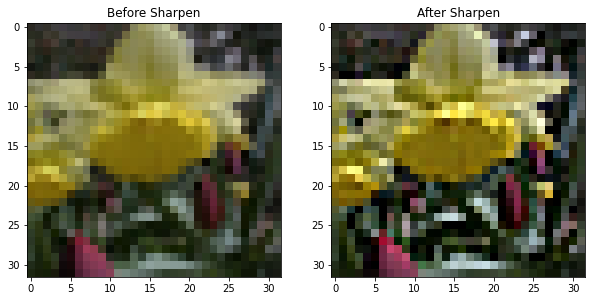

In [68]:
img = Image.fromarray(np.uint8(image * 256)).convert('RGB')
sharpen_img = img.filter(SHARPEN)

fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title("Before Sharpen")

fig.add_subplot(1, 2, 2)
plt.imshow(sharpen_img)
plt.title("After Sharpen")
plt.show()

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part B - Q2 E - Apply a filter to blur the image and display the image before and after blur


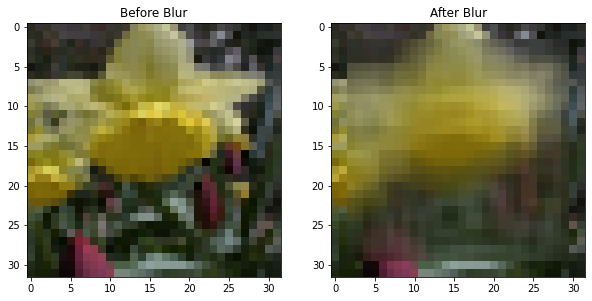

In [69]:
img = Image.fromarray(np.uint8(image * 256)).convert('RGB')
blur_img = img.filter(BLUR)

fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title("Before Blur")

fig.add_subplot(1, 2, 2)
plt.imshow(blur_img)
plt.title("After Blur")
plt.show()

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part B - Q2 F - Display all the 4 images from above questions besides each other to observe the difference.


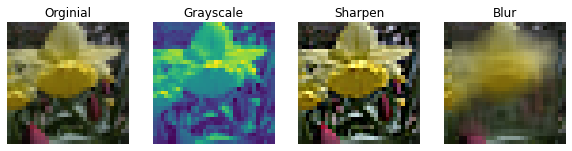

In [70]:
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 4, 1)
plt.imshow(image)
plt.axis('off')
plt.title("Orginial")

fig.add_subplot(1, 4, 2)
plt.imshow(skimage.color.rgb2gray(image))
plt.axis('off')
plt.title("Grayscale")

fig.add_subplot(1, 4, 3)
plt.imshow(sharpen_img)
plt.axis('off')
plt.title("Sharpen")

fig.add_subplot(1, 4, 4)
plt.imshow(blur_img)
plt.title("Blur")
plt.axis('off')
plt.show()

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Part B - Q3 A - Split the data into train and test with 80:20 proportion.


In [71]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [72]:
print(f"x_train shape is {x_train.shape} y_train shape is {y_train.shape}")
print(f"x_test shape is {x_test.shape} y_test shape is {y_test.shape}")

x_train shape is (1088, 32, 32, 3) y_train shape is (1088,)
x_test shape is (272, 32, 32, 3) y_test shape is (272,)


In [73]:
y_train

array([14,  2,  0, ..., 14, 10, 11])

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Part B - Q3 B - Train a model using any Supervised Learning algorithm and share performance metrics on test data.


In [74]:
x_train.shape

(1088, 32, 32, 3)

In [75]:
x_test.shape

(272, 32, 32, 3)

In [76]:
tr_shape, tr_ir, tr_ic, tr_icolor = x_train.shape

In [77]:
te_shape, te_ir, te_ic, te_icolor = x_test.shape

In [78]:
# We need image to be a countinous data to feed into ML algorithm. 
# Hence flatten the image array x_train and x_test
ml_x_train = x_train.reshape((tr_shape, tr_ir*tr_ic*tr_icolor))
ml_x_test = x_test.reshape((te_shape, te_ir*te_ic*te_icolor))

In [79]:
print(f"ml_x_train shape is {ml_x_train.shape} y_train shape is {y_train.shape}")
print(f"ml_x_test shape is {ml_x_test.shape} y_test shape is {y_test.shape}")

ml_x_train shape is (1088, 3072) y_train shape is (1088,)
ml_x_test shape is (272, 3072) y_test shape is (272,)


In [80]:
tf.executing_eagerly()

False

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics

In [82]:
tf.executing_eagerly()

False

In [83]:
def merge_df(src_df, dest_df):
    df = None
    df1 = set(src_df.columns)
    df2 = set(dest_df.columns)
    col = list(df1 & df2)
    
    if (len(col) == 1): # Do column wise merge
        df = src_df.merge(dest_df,on=col[0])
        assert((src_df.columns.size + dest_df.columns.size -1) == df.columns.size)
    else:
        df = pd.concat([src_df,dest_df],join='outer',axis=0)
    return df

In [84]:
def getClassificationDashboard(y_data, label, model_name, report='test', portal_df=None):
    index = [] if portal_df == None else list(portal_df.index.values)
    if (len(index) == 0):   # First time
        portal_index = ['Model', 'accuracy', 'precision', 'recall', 'f1-score', 'support', 'Report']
        portal_df = pd.DataFrame(columns=portal_index);
    accuracy = accuracy_score(y_true=y_data, y_pred=label)
    prfs = list(precision_recall_fscore_support(y_true=y_data, y_pred=label, average='weighted'))
    prfs.insert(0, model_name)
    prfs.insert(1, accuracy)
    prfs.insert(6, report)
    pd_series = pd.Series(prfs, index = portal_df.columns)
    portal_df = portal_df.append(pd_series, ignore_index=True)
    return portal_df

In [85]:
def print_binary_cm(y_test, predicted_labels, index=['NO','YES']):
    cm = metrics.confusion_matrix(y_test, predicted_labels)
    #print(y_test.value_counts())
    #print(cm)
    cm_df = pd.DataFrame(cm, index = index)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm_df, fmt="d", annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [86]:
# Function to be called to evaluate using LogisticRegression
def eval_lr(X_train, Y_train, X_test, Y_test):
    model = LogisticRegression(solver="liblinear")
    model.fit(X_train, Y_train)
    pl = model.predict(X_test)
    print_binary_cm(Y_test,pl, index=np.unique(Y_test))
    df1 = getClassificationDashboard(Y_train, model.predict(X_train), 'LogisticRegression', 'Train')
    df2 = getClassificationDashboard(Y_test, model.predict(X_test), 'LogisticRegression', 'Test')
    return merge_df(df1, df2)

In [87]:
def eval_knn(X_train, Y_train, X_test, Y_test):
    scores = []
    for k in range(1,50): # Loop will help to find good - K value
        NNH = KNeighborsClassifier(n_neighbors=k, weights='distance')
        NNH.fit(X_train, Y_train)
        scores.append(NNH.score(X_test, Y_test))
    k_value = scores.index(np.max(scores))
    NNH = KNeighborsClassifier(n_neighbors=k_value, p=1, weights='distance')
    #NNH = get_model('KNN',{"n_neighbors":k_value, "p":1, "weights":"distance" })
    NNH.fit(X_train, Y_train)
    pl = NNH.predict(X_test)
    print_binary_cm(Y_test,pl, index=np.unique(Y_test))
    df1 = getClassificationDashboard(Y_train, NNH.predict(X_train), 'KNN', 'Train')
    df2 = getClassificationDashboard(Y_test,NNH.predict(X_test), 'KNN', 'Test')
    return merge_df(df1, df2)

In [88]:
def eval_svm(X_train, Y_train, X_test, Y_test):
    svm_clf = svm.SVC();
    svm_clf.fit(X_train , Y_train)
    pl = svm_clf.predict(X_test)
    print_binary_cm(Y_test,pl,index=np.unique(Y_test))
    df1 = getClassificationDashboard(Y_train, svm_clf.predict(X_train), 'SVM', 'Train')
    df2 = getClassificationDashboard(Y_test,svm_clf.predict(X_test), 'SVM', 'Test')
    return merge_df(df1, df2)

In [89]:
# Function to be called to evaluate data using DecisionTreeClassifier
def eval_dtc(X_train, Y_train, X_test, Y_test):
    #dtc=DecisionTreeClassifier(criterion='entropy')
    dtc=DecisionTreeClassifier(criterion='entropy')
    dtc.fit(X_train, Y_train)
    pl = dtc.predict(X_test)
    print_binary_cm(Y_test,pl,index=np.unique(Y_test))
    df1 = getClassificationDashboard(Y_train, dtc.predict(X_train), 'DTC', 'Train')
    df2 = getClassificationDashboard(Y_test,dtc.predict(X_test), 'DTC', 'Test')
    return merge_df(df1, df2)

In [90]:
# Evaluation function for stacking
def eval_xgboost(X_train, Y_train, X_test, Y_test):
    model = XGBClassifier()
    model.fit(X_train, Y_train)
    pl = model.predict(X_test)
    print_binary_cm(Y_test,pl,index=np.unique(Y_test))
    df1 = getClassificationDashboard(Y_train, model.predict(X_train), 'Xgboost', 'Train')
    df2 = getClassificationDashboard(Y_test,model.predict(X_test), 'Xgboost', 'Test')
    return merge_df(df1, df2)

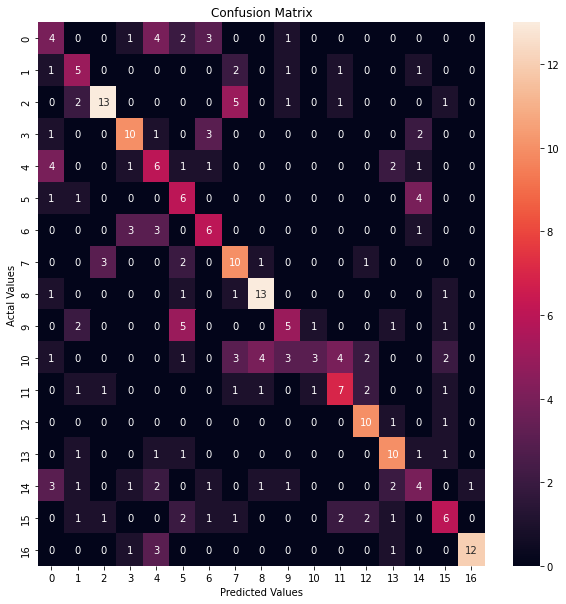

In [91]:
report_df = eval_lr(ml_x_train, y_train, ml_x_test, y_test)

In [ ]:
# Disabling KNN as it some times gives zero neighbour
report_df = merge_df(report_df, eval_knn(ml_x_train, y_train, ml_x_test, y_test))

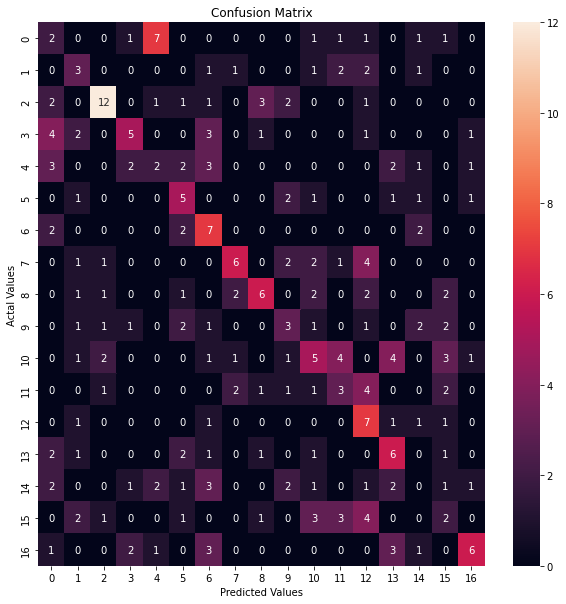

In [92]:
report_df = merge_df(report_df, eval_dtc(ml_x_train, y_train, ml_x_test, y_test))

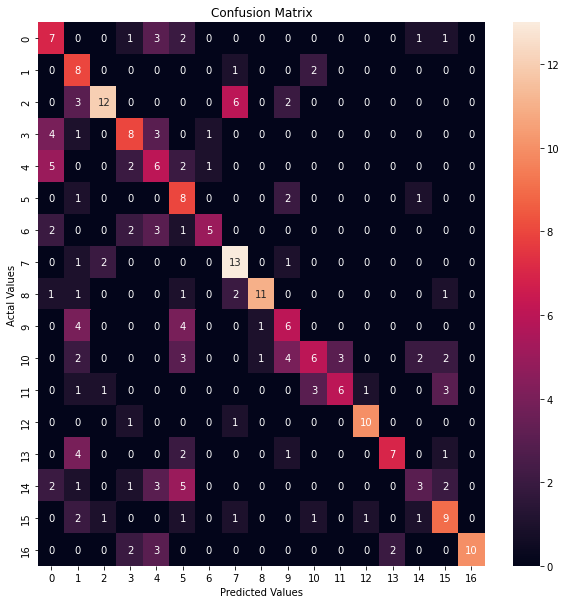

In [93]:
report_df = merge_df(report_df, eval_svm(ml_x_train, y_train, ml_x_test, y_test))

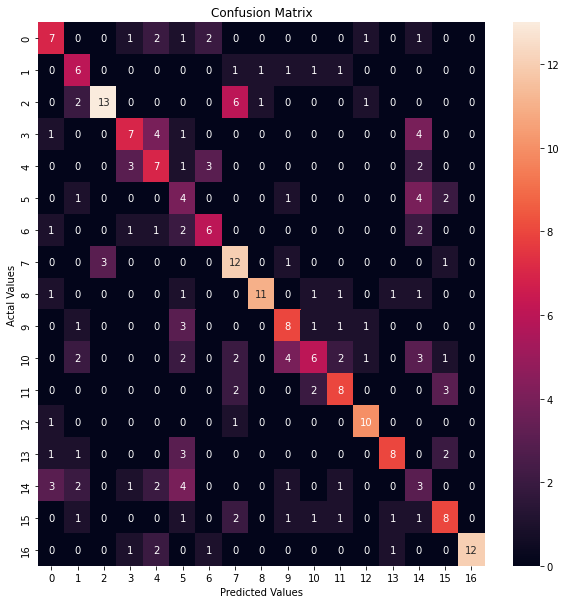

In [94]:
report_df = merge_df(report_df, eval_xgboost(ml_x_train, y_train, ml_x_test, y_test))

In [95]:
report_df

,Model,accuracy,precision,recall,f1-score,support,Report
0,LogisticRegression,1.000000,1.000000,1.000000,1.000000,None,Train
0,LogisticRegression,0.477941,0.501606,0.477941,0.470549,None,Test
0,DTC,1.000000,1.000000,1.000000,1.000000,None,Train
0,DTC,0.294118,0.307409,0.294118,0.290922,None,Test
0,SVM,0.892463,0.899524,0.892463,0.893430,None,Train
0,SVM,0.496324,0.567148,0.496324,0.504122,None,Test
0,Xgboost,1.000000,1.000000,1.000000,1.000000,None,Train
0,Xgboost,0.500000,0.547134,0.500000,0.511126,None,Test


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;"> The models are not giving good accuracy. Out of these models - SVM and Xgboost gives better result but they are not sufficiently prove the machine learning algorithm can be further used to improve performance

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Part B - Q3 C - Train a model using Neural Network and share performance metrics on test data.


In [96]:
from tensorflow.keras.layers import Activation
from tensorflow.keras import optimizers

In [103]:
# Let us use he_normal as kernel_initializer with Adam + Batch Normalization
def get_optimized_model_6():
    model = Sequential()
    model.add(Dense(256, input_shape = (3072,), kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dense(148, kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dense(64, kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dense(32, kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dense(17, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    my_optimizer = optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer = my_optimizer, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
   # model.summary()
    return model

In [ ]:
tf.squeeze(y_train).shape

(1088, 3072)
(3072,)


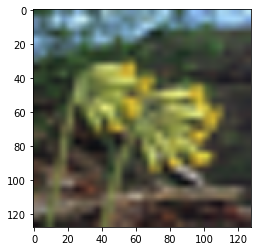

In [98]:
x_nn_train = x_train.reshape(x_train.shape[0], 32*32*3)
print(x_nn_train.shape)
array = x_nn_train[100]
print(array.shape)
image = np.reshape(array, (32, 32, 3))
image = cv2.resize(image, dsize=(128,128))
plt.imshow(image)

In [99]:
x_test.reshape(x_test.shape[0], 32*32*3).shape

(272, 3072)

In [100]:
y_train.shape

(1088,)

In [101]:
y_test.shape

(272,)

In [104]:
nn_model = get_optimized_model_6()
history=nn_model.fit(x_train.reshape(x_train.shape[0], 32*32*3), y_train, validation_data=(x_test.reshape(x_test.shape[0], 32*32*3),y_test), epochs=32, batch_size=50, verbose=True)
#nn_model.fit(X,Y,batch_size=32,epochs=3,validation_split=0.2)
#val_loss, val_accuracy  = nn_model.evaluate(x_test, y_test, verbose=True)

Train on 1088 samples, validate on 272 samples
Epoch 1/32
1088/1088 [==============================] - 0s 441us/sample - loss: 2.8189 - acc: 0.1719 - val_loss: 5.4340 - val_acc: 0.0882
Epoch 2/32
 700/1088 [==================>...........] - ETA: 0s - loss: 1.9469 - acc: 0.4143

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1088/1088 [==============================] - 0s 98us/sample - loss: 1.9383 - acc: 0.4099 - val_loss: 3.5715 - val_acc: 0.1029
Epoch 3/32
1088/1088 [==============================] - 0s 102us/sample - loss: 1.5591 - acc: 0.5276 - val_loss: 2.9600 - val_acc: 0.1875
Epoch 4/32
1088/1088 [==============================] - 0s 97us/sample - loss: 1.2430 - acc: 0.6507 - val_loss: 2.6309 - val_acc: 0.2169
Epoch 5/32
1088/1088 [==============================] - 0s 94us/sample - loss: 0.9886 - acc: 0.7601 - val_loss: 2.3772 - val_acc: 0.3051
Epoch 6/32
1088/1088 [==============================] - 0s 97us/sample - loss: 0.7844 - acc: 0.8327 - val_loss: 2.2712 - val_acc: 0.3015
Epoch 7/32
1088/1088 [==============================] - 0s 96us/sample - loss: 0.6160 - acc: 0.8888 - val_loss: 2.1219 - val_acc: 0.3824
Epoch 8/32
1088/1088 [==============================] - 0s 97us/sample - loss: 0.4786 - acc: 0.9338 - val_loss: 2.1253 - val_acc: 0.3713
Epoch 9/32
1088/1088 [=============================

In [107]:
y_pred_1=nn_model.predict(x_test.reshape(x_test.shape[0], 32*32*3))
y_pred_final_1=[]
for i in y_pred_1:
  y_pred_final_1.append(np.argmax(i))

print(classification_report(y_test,y_pred_final_1))

              precision    recall  f1-score   support

           0       0.12      0.13      0.13        15
           1       0.23      0.27      0.25        11
           2       0.65      0.74      0.69        23
           3       0.47      0.41      0.44        17
           4       0.26      0.50      0.34        16
           5       0.24      0.42      0.30        12
           6       0.42      0.38      0.40        13
           7       0.55      0.35      0.43        17
           8       0.82      0.53      0.64        17
           9       0.31      0.27      0.29        15
          10       0.44      0.35      0.39        23
          11       0.41      0.47      0.44        15
          12       0.67      0.83      0.74        12
          13       0.47      0.47      0.47        15
          14       0.42      0.47      0.44        17
          15       0.45      0.29      0.36        17
          16       1.00      0.47      0.64        17

    accuracy              

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Part B - Q3 D - Train a model using a basic CNN and share performance metrics on test data.


In [132]:
def get_cnn_model():
    cnn_model = Sequential()
    
    cnn_model.add(InputLayer(input_shape = (32,32,3,)))

    cnn_model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
    cnn_model.add(MaxPool2D(pool_size = (2,2)))
    cnn_model.add(BatchNormalization())
    
    cnn_model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
    cnn_model.add(MaxPool2D(pool_size = (2,2)))
    cnn_model.add(BatchNormalization())

    cnn_model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
    cnn_model.add(MaxPool2D(pool_size = (2,2)))
    cnn_model.add(BatchNormalization())

    cnn_model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
    cnn_model.add(MaxPool2D(pool_size = (2,2)))
    cnn_model.add(BatchNormalization())

    cnn_model.add(Conv2D(128, kernel_size=(3,3), strides = (1,1), padding='same', activation='relu'))
    cnn_model.add(MaxPool2D(pool_size = (2,2)))
    cnn_model.add(GlobalMaxPool2D())

    cnn_model.add(Flatten())

    cnn_model.add(Dense(128, activation='relu'))
    cnn_model.add(Dropout(0.2))
    cnn_model.add(Dense(64, activation='relu'))
    cnn_model.add(Dense(32, activation='relu'))
    cnn_model.add(BatchNormalization())
    
    cnn_model.add(Dense(17, activation='softmax'))
    return cnn_model

In [163]:
def get_cnn_modle_2():
  
    cnn_model_2 = Sequential()
    cnn_model_2.add(Conv2D(64, (3,3), padding='same', input_shape=(32, 32, 3), activation='relu'))
    cnn_model_2.add(BatchNormalization())
    cnn_model_2.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    cnn_model_2.add(BatchNormalization())
    cnn_model_2.add(MaxPool2D(pool_size=(2,2)))
    cnn_model_2.add(Dropout(0.3))
    
    cnn_model_2.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    cnn_model_2.add(BatchNormalization())
    cnn_model_2.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    cnn_model_2.add(BatchNormalization())
    cnn_model_2.add(MaxPool2D(pool_size=(2,2)))
    cnn_model_2.add(Dropout(0.3))
    
    cnn_model_2.add(Flatten())
    cnn_model_2.add(Dense(64))
    cnn_model_2.add(Dense(32))
    cnn_model_2.add(Dense(17, activation='softmax'))
    return cnn_model_2

In [166]:
cnn_model = get_cnn_modle_2()
cnn_model.compile(optimizer=optimizers.SGD(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [169]:
cnn_model.fit(x_train, y_train, validation_data=(x_test,y_test), steps_per_epoch = 32, batch_size=200, epochs=50, verbose=True)

Train on 32 samples, validate on 272 samples
Epoch 1/50
32/32 [==============================] - 1s 30ms/step - batch: 15.5000 - size: 1.0000 - loss: 0.0135 - acc: 0.9976 - val_loss: 1.3031 - val_acc: 0.7206
Epoch 2/50
32/32 [==============================] - 1s 30ms/step - batch: 15.5000 - size: 1.0000 - loss: 0.0130 - acc: 0.9976 - val_loss: 1.2858 - val_acc: 0.7206
Epoch 3/50
32/32 [==============================] - 1s 30ms/step - batch: 15.5000 - size: 1.0000 - loss: 0.0134 - acc: 0.9974 - val_loss: 1.3355 - val_acc: 0.7243
Epoch 4/50
32/32 [==============================] - 1s 29ms/step - batch: 15.5000 - size: 1.0000 - loss: 0.0122 - acc: 0.9977 - val_loss: 1.4459 - val_acc: 0.7132
Epoch 5/50
32/32 [==============================] - 1s 29ms/step - batch: 15.5000 - size: 1.0000 - loss: 0.0128 - acc: 0.9972 - val_loss: 1.3093 - val_acc: 0.7059
Epoch 6/50
32/32 [==============================] - 1s 29ms/step - batch: 15.5000 - size: 1.0000 - loss: 0.0124 - acc: 0.9974 - val_loss: 1.

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;"> Part B - Q3 E - Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label.


In [ ]:
cnn_model.evaluate(x_test, y_test)

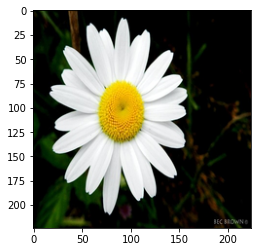

(32, 32, 3)


/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [174]:
image_to_predict = 'drive/My Drive/Colab Notebooks/Prediction.jpg'
img = Image.open(image_to_predict)
plt.imshow(img)
plt.show()

pred_img = cv2.imread(image_to_predict)
pred_img = cv2.resize(pred_img, (32, 32))
img = np.expand_dims(pred_img, axis=0)
print(pred_img.shape)
pred_plant = cnn_model.predict(img)
print(pred_plant)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:green;"> Our model is predicting a Dasiy flower as Daffodil flower category. We could run with more convelution layer and we should be able to fine tune it to get more accuracy. However due to resource shortage - i'm stopping it here....:)